# Decision Trees

In this notebook we are going to learn a decision tree from data and inspect it.

In [9]:
# First things first: import modules and load a dataset

#from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer
#from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
#from pydotplus import graph_from_dot_data

# Random seed:
np.random.seed(48748)

data = load_breast_cancer()

We loaded the UCI breast cancer dataset.
Let us split the data into training and testing sets:

In [10]:
# Scikit-Learn has a handy tool for creating a random train-test split
features_train, features_test, target_train, target_test = \
    train_test_split(data.data, data.target, test_size=0.3, stratify = data.target)

Now we will learn a decision tree from the test data:

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(features_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

There are some handy libraries for visualizing the decision trees scikit-learn produces.
This is our learned tree:

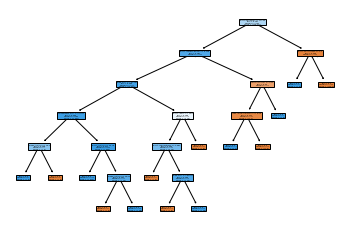

In [13]:
plt.figure()
plot_tree(dtree, feature_names=data.feature_names, filled=True)
plt.show()

How well does our tree perform on the test set?

In [29]:
# Get predictions
yhat = dtree.predict(features_test)

# Get confusion matrix
tp = sum( yhat & target_test )
fp = sum( yhat & (1-target_test) )
tn = sum( (1-yhat) & (1-target_test) )
fn = sum( (1-yhat) & target_test )

DataFrame( [[tp, fp],[fn, tn]], columns = ["y = 1", "y = 0"], index = ["pred = 1", "pred = 0"])

,y = 1,y = 0
pred = 1,101,7
pred = 0,6,57


In [31]:
# Print pretty table with precision, recall, and F1

prec = tp/(tp+fp)
rec = tp/(tp+fn)
fpr = fp/(fp+tn)
spec = tn/(fp+tn)
f1 = 2*prec*rec/(prec+rec)

DataFrame([[prec, rec, fpr, spec, f1]], columns=["Precision", "Recall", "False positive rate", "Specificity", "F1-score" ], index=[''])

,Precision,Recall,False positive rate,Specificity,F1-score
,0.935185,0.943925,0.109375,0.890625,0.939535
